In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-04-22,2637439
2020-04-23,2722857
2020-04-24,2828682
2020-04-25,2919404
2020-04-26,2993262


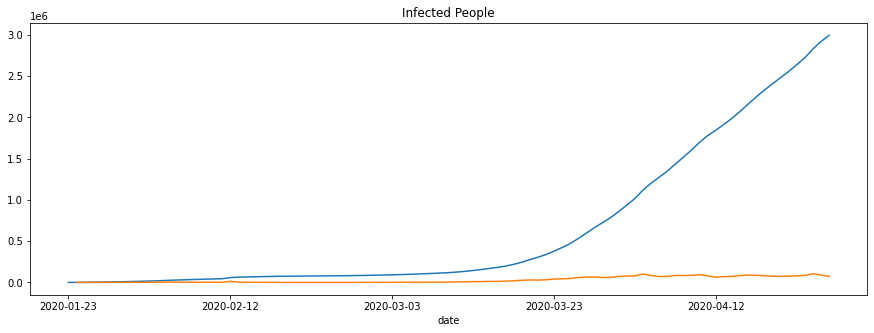

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1867.235, BIC=1882.430, Fit time=3.444 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1894.165, BIC=1899.230, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1895.768, BIC=1903.366, Fit time=0.613 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1895.206, BIC=1902.804, Fit time=0.435 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1888.972, BIC=1901.635, Fit time=1.783 seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=1890.195, BIC=1902.858, Fit time=2.485 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1); AIC=1896.515, BIC=1906.645, Fit time=1.460 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1869.091, BIC=1889.352, Fit time=6.693 seconds
Total fit time: 21.581 seconds


In [8]:
stepwise_model.aic()

1867.2348030124597

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-27 - 3065912
2020-04-28 - 3145962
2020-04-29 - 3236803
2020-04-30 - 3334687
2020-05-01 - 3431826
